In [13]:
import pandas as pd

# Load the .sif file
sif_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data/CCLE_Expression.Arrays.sif_2012-10-18.txt'

# Read the .sif file (assuming it's tab-delimited)
sif_df = pd.read_csv(sif_file, sep='\t', dtype=str)

# Display the first few rows to understand the structure
print("Preview of the .sif file:")
print(sif_df.head())

Preview of the .sif file:
                                                 ID  \
0  METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A02_240852   
1  METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A05_240858   
2  METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A07_240862   
3  METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A08_240864   
4  METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A09_240866   

                     CCLE name Cell line primary name Gender Batch  \
0  LN18_CENTRAL_NERVOUS_SYSTEM                  LN-18      M     1   
1                  769P_KIDNEY                  769-P      F     1   
2                  786O_KIDNEY                  786-O      M     1   
3                  CAOV3_OVARY                 Caov-3      F     1   
4                  HEPG2_LIVER                 Hep G2      M     1   

             Site Primary  Histology                    Hist Subtype1  
0  central_nervous_system     glioma             astrocytoma_Grade_IV  
1                  kidney  carcinoma  clear_cell_renal_cell_carcinoma  
2     

In [14]:
# Filter for CNS cell lines based on 'Site Primary' column
cns_cell_lines = sif_df[sif_df['Site Primary'].str.contains('central_nervous_system', case=False, na=False)]

# Display the CNS cell lines
print("\nCNS Cell Lines Identified:")
print(cns_cell_lines[['CCLE name', 'Cell line primary name', 'Site Primary', 'Histology', 'Hist Subtype1']])

# Save the list of CNS cell line names for further analysis
cns_cell_lines['CCLE name'].to_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CNS_Cell_Lines_List.txt', index=False, header=False)
print("\nCNS cell lines saved to 'CNS_Cell_Lines_List.txt'.")


CNS Cell Lines Identified:
                             CCLE name Cell line primary name  \
0          LN18_CENTRAL_NERVOUS_SYSTEM                  LN-18   
47         T98G_CENTRAL_NERVOUS_SYSTEM                   T98G   
49    DBTRG05MG_CENTRAL_NERVOUS_SYSTEM             DBTRG-05MG   
61         A172_CENTRAL_NERVOUS_SYSTEM                   A172   
75        SF295_CENTRAL_NERVOUS_SYSTEM                 SF-295   
...                                ...                    ...   
1021      LN382_CENTRAL_NERVOUS_SYSTEM                  LN382   
1022    IOMMLEE_CENTRAL_NERVOUS_SYSTEM               IOMM-Lee   
1027     LNZ308_CENTRAL_NERVOUS_SYSTEM                 LNZ308   
1028      LN340_CENTRAL_NERVOUS_SYSTEM                 LN-340   
1035    CH157MN_CENTRAL_NERVOUS_SYSTEM               CH-157MN   

                Site Primary   Histology         Hist Subtype1  
0     central_nervous_system      glioma  astrocytoma_Grade_IV  
47    central_nervous_system      glioma  astrocytoma_Grade_I

Now based on the filtered CNS names, do the filtering to .gct file

In [7]:
# Paths to files
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data/CCLE_Expression_Entrez_2012-09-29.gct'
cns_cell_lines_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CNS_Cell_Lines_List.txt'

# Step 1: Load the CNS cell lines list
cns_cell_lines = pd.read_csv(cns_cell_lines_file, header=None)[0].tolist()

# Step 2: Load the .gct file (skip first two lines with metadata)
gct_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Step 3: Identify columns to keep
# Always keep 'Name' and 'Description' columns
columns_to_keep = ['Name', 'Description'] + [col for col in gct_df.columns if col in cns_cell_lines]

# Step 4: Filter the DataFrame
filtered_gct_df = gct_df[columns_to_keep]

# Step 5: Save the filtered data back to a .gct format
output_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'

# Writing the .gct header
with open(output_file, 'w') as f:
    f.write("#1.2\n")
    f.write(f"{filtered_gct_df.shape[0]}\t{filtered_gct_df.shape[1] - 2}\n")  # rows and columns count
    filtered_gct_df.to_csv(f, sep='\t', index=False)

print(f"Filtered .gct file saved to: {output_file}")

/var/folders/1t/7fwv9kh94kzg262gs3xffmxw0000gn/T/ipykernel_71296/1521594719.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  gct_df = pd.read_csv(gct_file, sep='\t', skiprows=2)


Filtered .gct file saved to: /Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct


In [15]:
import numpy as np
import re

# Load the filtered glioma cell lines
glioma_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'
# Skip the first two lines which contain metadata in .gct format
glioma_df = pd.read_csv(glioma_file, sep='\t', skiprows=2)

# Print the first few rows to check the data
print("First few rows of the glioma_df DataFrame:")
print(glioma_df.head())

# Extract cell line names from the DataFrame (starting from the 3rd column)
cell_line_names = glioma_df.columns[2:]

# Collected Age Data (as a list) aligned to cell lines
age_data = ["61Y", "61Y", "59Y", "53Y", "67Y", "33Y", "54Y", "61Y", "44Y", "NaN", "49Y", "63Y", "47Y", "42Y", "75Y", 
            "53Y", "75Y", "55Y", "NaN", "54Y", "37Y", "6Y", "NaN", "16Y", "49Y", "55Y", "65Y", "13Y", "74Y", "36Y", 
            "63Y", "60Y", "50Y", "57Y", "68Y", "68Y", "3Y5M", "72Y", "76Y", "2Y", "67Y", "58Y", "61Y", "61Y", "40Y", 
            "65Y", "4Y", "42Y", "47Y", "47Y", "35Y", "54Y", "48Y", "38Y", "48Y", "36Y", "54Y", "NaN", "56Y", "NaN", 
            "66Y", "NaN", "67Y", "67Y", "61Y", "60Y", "57Y", "41Y","NaN"]

# Ensure age_data matches the number of cell lines
if len(age_data) != len(cell_line_names):
    print(f"Error: Age data length ({len(age_data)}) does not match the number of cell lines ({len(cell_line_names)}).")
else:
    # Create a DataFrame for cell lines and age
    age_df = pd.DataFrame({
        'Cell Line': cell_line_names,
        'Age': age_data
    })

    # Function to parse age strings into numerical values
    def parse_age(age_str):
        if pd.isna(age_str) or age_str == "NaN":
            return np.nan
        match = re.match(r'(\d+)Y(?:\s*(\d+)M)?', age_str)
        if match:
            years = int(match.group(1))
            months = int(match.group(2)) if match.group(2) else 0
            return years + months / 12
        return np.nan

    # Apply the parsing function
    age_df['Parsed_Age'] = age_df['Age'].apply(parse_age)

    # Classify as Pediatric or Adult
    def classify_age(age):
        if pd.isna(age):
            return 'Unknown'
        elif age <= 18:
            return 'Pediatric'
        else:
            return 'Adult'

    age_df['Age Group'] = age_df['Parsed_Age'].apply(classify_age)

    # Display the age classification
    print("\nCell Lines with Age and Classification:")
    print(age_df[['Cell Line', 'Age', 'Parsed_Age', 'Age Group']])

    # Save the age classification DataFrame
    age_df.to_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Cell_Lines_With_Age_Classification.csv', index=False)
    print("\nCell line age classification saved to 'Cell_Lines_With_Age_Classification.csv'.")

First few rows of the glioma_df DataFrame:
           Name   Description  LN18_CENTRAL_NERVOUS_SYSTEM  \
0  100009676_at  LOC100009676                     5.987545   
1      10000_at          AKT3                     6.230233   
2      10001_at          MED6                     9.363550   
3      10002_at         NR2E3                     3.803069   
4      10003_at       NAALAD2                     3.586430   

   T98G_CENTRAL_NERVOUS_SYSTEM  DBTRG05MG_CENTRAL_NERVOUS_SYSTEM  \
0                     6.311585                          5.313698   
1                     6.401691                          6.863649   
2                     8.421563                          8.418090   
3                     3.747394                          3.939320   
4                     3.646235                          3.662396   

   A172_CENTRAL_NERVOUS_SYSTEM  SF295_CENTRAL_NERVOUS_SYSTEM  \
0                     5.353808                      5.641202   
1                     8.464749                 

Summary Statistics for Each Cell Line:
                                    count      mean       std       min  \
LN18_CENTRAL_NERVOUS_SYSTEM       18988.0  6.392509  2.476663  2.911527   
T98G_CENTRAL_NERVOUS_SYSTEM       18988.0  6.381454  2.437902  2.932820   
DBTRG05MG_CENTRAL_NERVOUS_SYSTEM  18988.0  6.363935  2.473492  3.022627   
A172_CENTRAL_NERVOUS_SYSTEM       18988.0  6.374801  2.455949  2.952827   
SF295_CENTRAL_NERVOUS_SYSTEM      18988.0  6.391452  2.441120  3.010484   
...                                   ...       ...       ...       ...   
LN382_CENTRAL_NERVOUS_SYSTEM      18988.0  6.403314  2.404691  2.993179   
IOMMLEE_CENTRAL_NERVOUS_SYSTEM    18988.0  6.426459  2.393249  2.971148   
LNZ308_CENTRAL_NERVOUS_SYSTEM     18988.0  6.401908  2.433152  3.008906   
LN340_CENTRAL_NERVOUS_SYSTEM      18988.0  6.396075  2.437164  2.931140   
CH157MN_CENTRAL_NERVOUS_SYSTEM    18988.0  6.411566  2.409713  3.048301   

                                       25%       50%       7

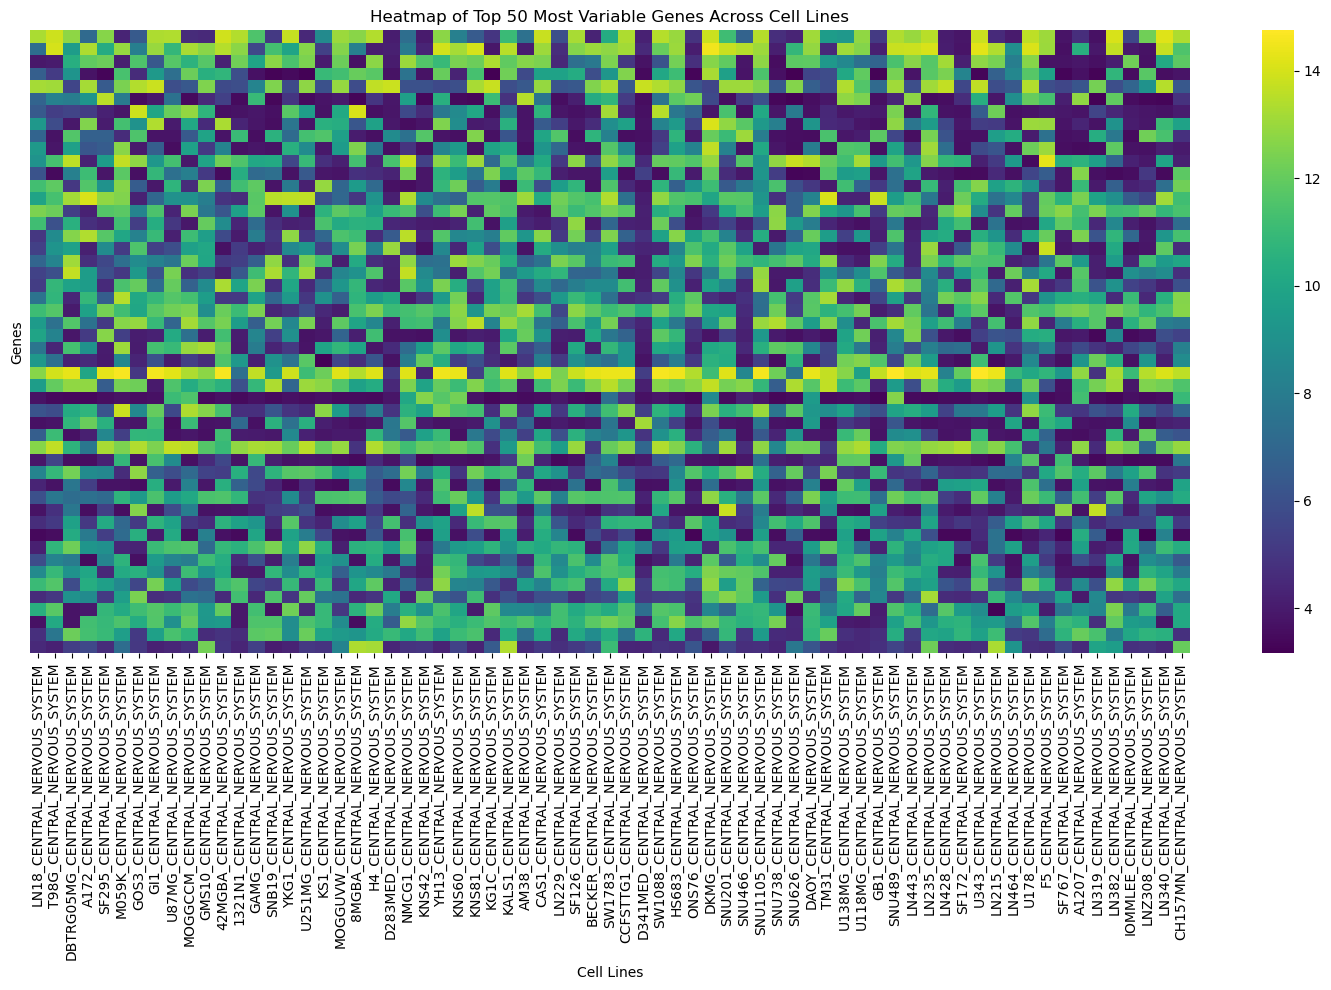

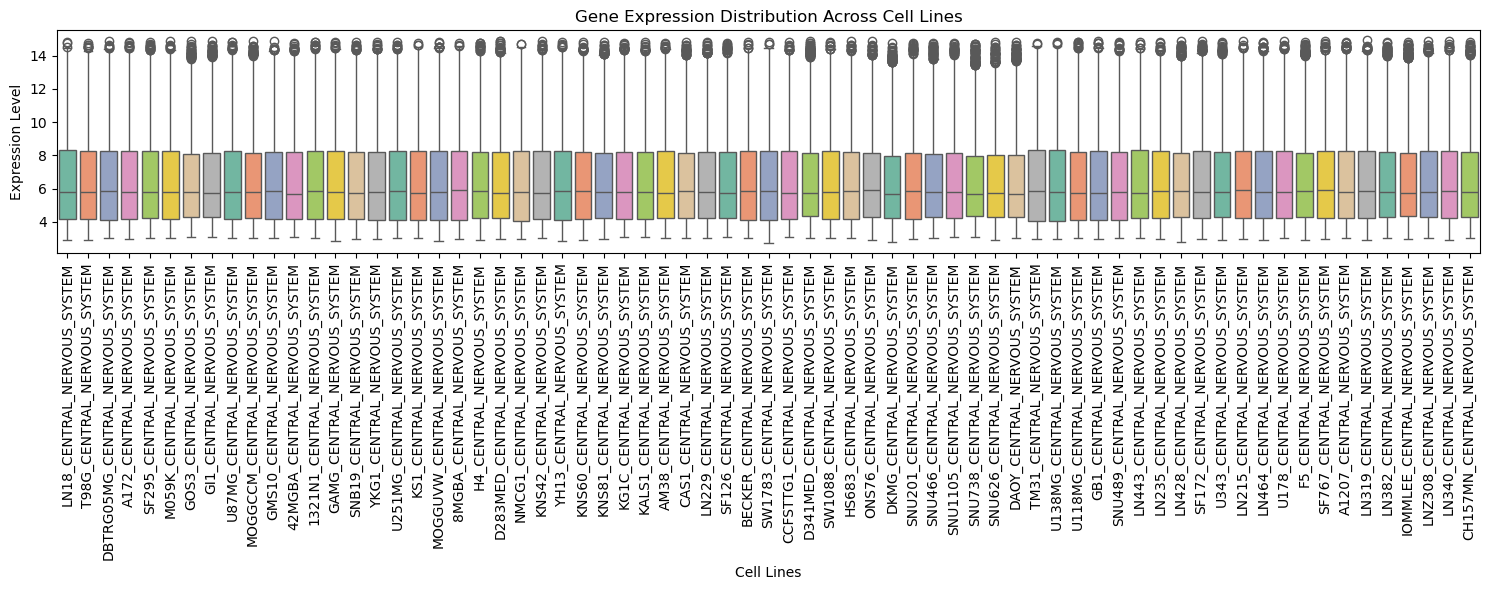

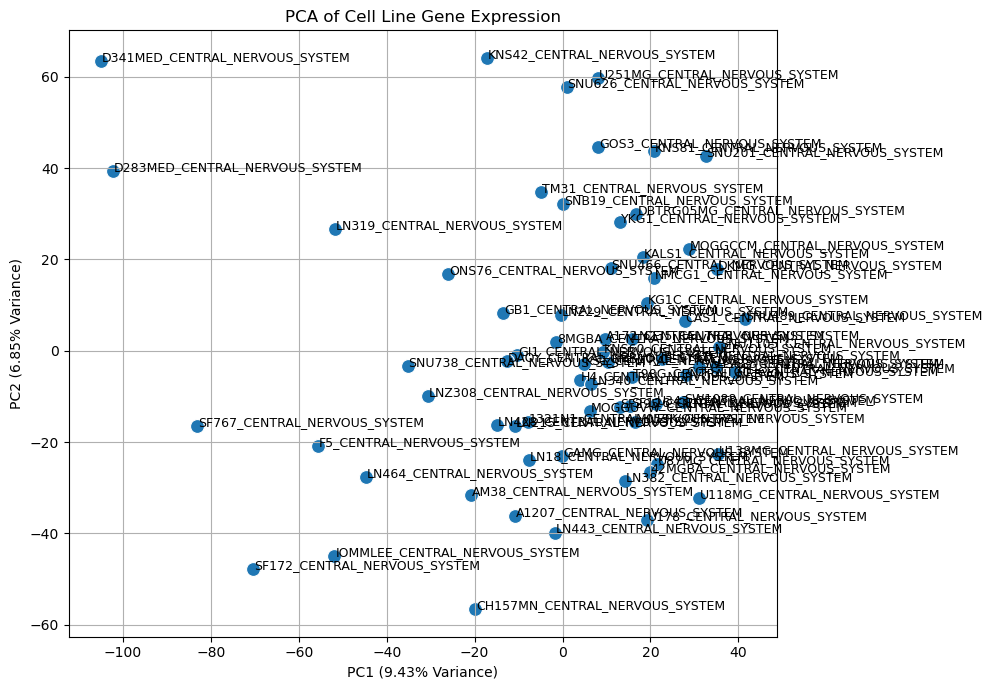

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the filtered glioma cell lines from the .gct file
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'

# Skip first two lines of metadata
glioma_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Extract cell line data (starting from the 3rd column)
cell_line_data = glioma_df.iloc[:, 2:]

# ------------------------------
# 1. Summary Statistics
# ------------------------------
summary_stats = cell_line_data.describe().transpose()
print("Summary Statistics for Each Cell Line:")
print(summary_stats)

# ------------------------------
# 2. Heatmap of Gene Expression
# ------------------------------
# For visualization, select a subset of genes (e.g., top 50 most variable genes)
gene_variances = cell_line_data.var(axis=1)
top_genes = gene_variances.sort_values(ascending=False).head(50).index
top_gene_data = cell_line_data.iloc[top_genes]

plt.figure(figsize=(15, 10))
sns.heatmap(top_gene_data, cmap='viridis', xticklabels=cell_line_data.columns, yticklabels=False)
plt.title('Heatmap of Top 50 Most Variable Genes Across Cell Lines')
plt.xlabel('Cell Lines')
plt.ylabel('Genes')
plt.tight_layout()
plt.show()

# ------------------------------
# 3. Boxplot of Gene Expression per Cell Line
# ------------------------------
plt.figure(figsize=(15, 6))
sns.boxplot(data=cell_line_data, palette='Set2')
plt.xticks(rotation=90)
plt.title('Gene Expression Distribution Across Cell Lines')
plt.xlabel('Cell Lines')
plt.ylabel('Expression Level')
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Principal Component Analysis (PCA)
# ------------------------------
# Transpose for PCA (samples as rows, genes as columns)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cell_line_data.transpose())

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cell Line'] = cell_line_data.columns

# Plot PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df['PC1'][i]+0.2, pca_df['PC2'][i], pca_df['Cell Line'][i], fontsize=9)
plt.title('PCA of Cell Line Gene Expression')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.grid(True)
plt.tight_layout()
plt.show()

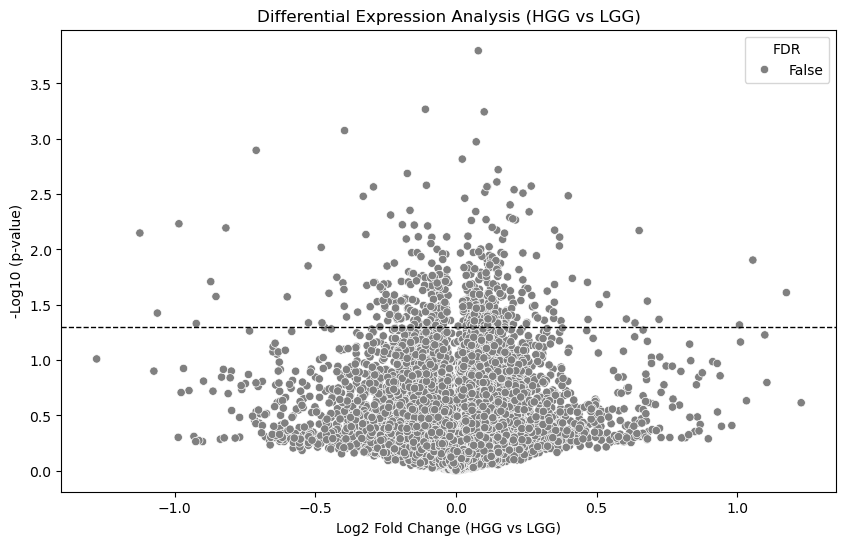

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# ---------------------------------
# Step 1: Load Expression Data
# ---------------------------------
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'

# Skip first two lines of metadata
glioma_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Extract gene names and cell line expression data
gene_names = glioma_df[['Name', 'Description']]  # Keep metadata
cell_line_data = glioma_df.iloc[:, 2:]  # Only expression values

# ---------------------------------
# Step 2: Manually Define LGG, HGG, and Healthy Cell Lines
# ---------------------------------
# Define cell line categories based on prior knowledge
healthy_lines = []  # Add names of healthy brain cell lines if available
lgg_lines = ["T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM"]  # Example LGG lines
hgg_lines = ["LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM"]  # Example HGG lines

# Check if selected cell lines exist in the dataset
selected_cell_lines = lgg_lines + hgg_lines
missing_lines = [cl for cl in selected_cell_lines if cl not in cell_line_data.columns]
if missing_lines:
    print(f"Warning: The following cell lines are missing in the dataset: {missing_lines}")

# ---------------------------------
# Step 3: Subset Expression Data for LGG & HGG
# ---------------------------------
# Keep only selected cell lines for DE analysis
expression_data = cell_line_data[selected_cell_lines]

# Separate LGG and HGG groups
lgg_data = expression_data[lgg_lines]
hgg_data = expression_data[hgg_lines]

# ---------------------------------
# Step 4: Differential Expression Analysis (HGG vs LGG)
# ---------------------------------
p_values = []
fold_changes = []

for gene_idx in range(len(expression_data)):
    gene_lgg = lgg_data.iloc[gene_idx].dropna()
    gene_hgg = hgg_data.iloc[gene_idx].dropna()
    
    # Compute fold-change (log2)
    fold_change = np.log2(gene_hgg.mean() / gene_lgg.mean())
    
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(gene_hgg, gene_lgg, equal_var=False, nan_policy='omit')
    
    fold_changes.append(fold_change)
    p_values.append(p_val)

# Convert results into a DataFrame
de_results = pd.DataFrame({
    'Gene': gene_names['Description'],
    'log2FC': fold_changes,
    'p-value': p_values
})

# Adjust p-values using False Discovery Rate (FDR) correction
de_results['FDR'] = multipletests(de_results['p-value'], method='fdr_bh')[1]

# Save results
de_results.to_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Differential_Expression_HGG_vs_LGG.csv', index=False)

# ---------------------------------
# Step 5: Visualization - Volcano Plot
# ---------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=de_results, x='log2FC', y=-np.log10(de_results['p-value']), hue=(de_results['FDR'] < 0.05), palette={True: 'red', False: 'gray'})
plt.axhline(y=-np.log10(0.05), linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Log2 Fold Change (HGG vs LGG)')
plt.ylabel('-Log10 (p-value)')
plt.title('Differential Expression Analysis (HGG vs LGG)')
plt.show()

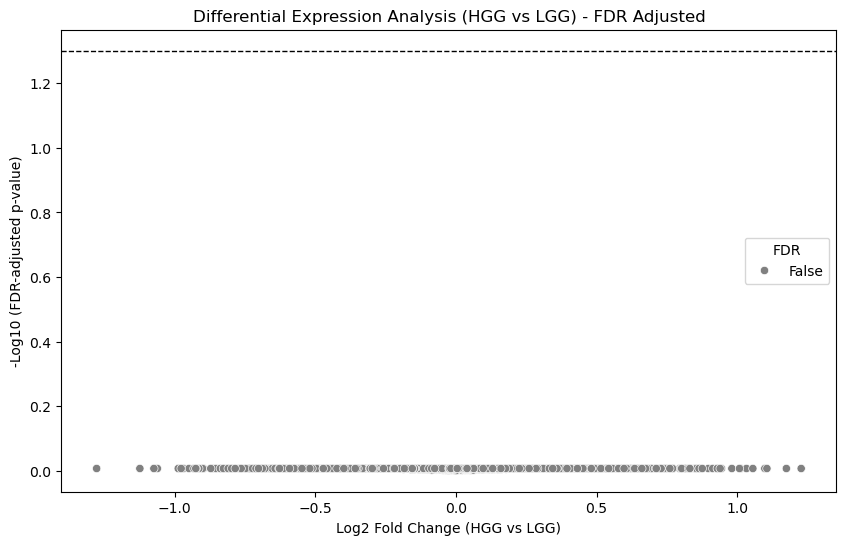

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# ---------------------------------
# Step 1: Load Expression Data
# ---------------------------------
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'

# Skip first two lines of metadata
glioma_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Extract gene names and cell line expression data
gene_names = glioma_df[['Name', 'Description']]
cell_line_data = glioma_df.iloc[:, 2:]

# ---------------------------------
# Step 2: Define LGG and HGG Cell Lines
# ---------------------------------
lgg_lines = ["T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM"]  # Example LGG lines
hgg_lines = ["LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM"]  # Example HGG lines

# Check if selected cell lines exist in the dataset
selected_cell_lines = lgg_lines + hgg_lines
missing_lines = [cl for cl in selected_cell_lines if cl not in cell_line_data.columns]
if missing_lines:
    print(f"Warning: The following cell lines are missing in the dataset: {missing_lines}")

# ---------------------------------
# Step 3: Subset Expression Data for LGG & HGG
# ---------------------------------
expression_data = cell_line_data[selected_cell_lines]
lgg_data = expression_data[lgg_lines]
hgg_data = expression_data[hgg_lines]

# ---------------------------------
# Step 4: Differential Expression Analysis (HGG vs LGG)
# ---------------------------------
p_values = []
fold_changes = []

for gene_idx in range(len(expression_data)):
    gene_lgg = lgg_data.iloc[gene_idx].dropna()
    gene_hgg = hgg_data.iloc[gene_idx].dropna()
    
    # Compute fold-change (log2)
    fold_change = np.log2(gene_hgg.mean() / gene_lgg.mean())
    
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(gene_hgg, gene_lgg, equal_var=False, nan_policy='omit')
    
    fold_changes.append(fold_change)
    p_values.append(p_val)

# Convert results into a DataFrame
de_results = pd.DataFrame({
    'Gene': gene_names['Description'],
    'log2FC': fold_changes,
    'p-value': p_values
})

# Adjust p-values using False Discovery Rate (FDR) correction
de_results['FDR'] = multipletests(de_results['p-value'], method='fdr_bh')[1]

# Save results
de_results.to_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Differential_Expression_HGG_vs_LGG_FDR.csv', index=False)

# ---------------------------------
# Step 5: Visualization - Volcano Plot Reflecting FDR-Adjusted P-Values
# ---------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=de_results, x='log2FC', y=-np.log10(de_results['FDR']), 
                hue=(de_results['FDR'] < 0.05), palette={True: 'red', False: 'gray'})

plt.axhline(y=-np.log10(0.05), linestyle='dashed', color='black', linewidth=1)  # FDR significance threshold
plt.xlabel('Log2 Fold Change (HGG vs LGG)')
plt.ylabel('-Log10 (FDR-adjusted p-value)')
plt.title('Differential Expression Analysis (HGG vs LGG) - FDR Adjusted')
plt.show()

Number of significant genes: 0


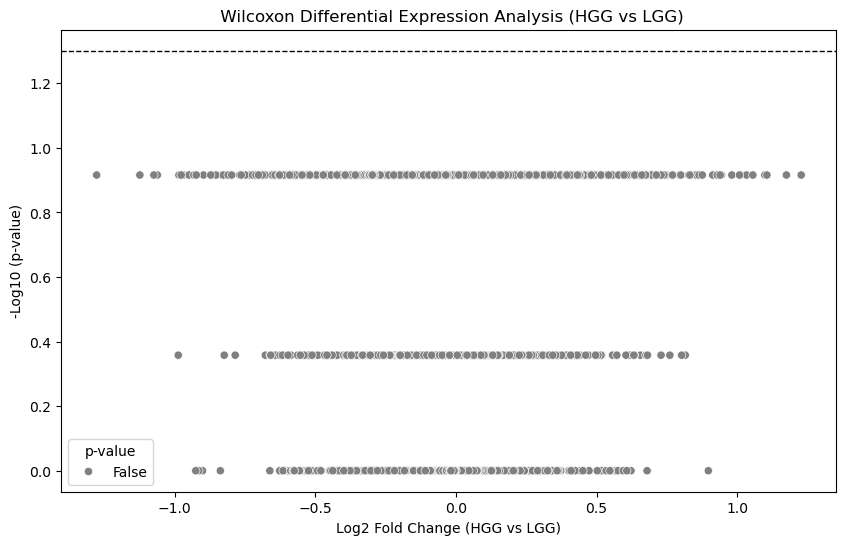

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
import gseapy as gp  # For pathway analysis

# ---------------------------------
# Step 1: Load Expression Data
# ---------------------------------
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'

# Skip first two lines of metadata
glioma_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Extract gene names and cell line expression data
gene_names = glioma_df[['Name', 'Description']]
cell_line_data = glioma_df.iloc[:, 2:]

# ---------------------------------
# Step 2: Define LGG, HGG Cell Lines
# ---------------------------------
lgg_lines = ["T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM"]  # Example LGG lines
hgg_lines = ["LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM"]  # Example HGG lines

# Check if selected cell lines exist in the dataset
selected_cell_lines = lgg_lines + hgg_lines
missing_lines = [cl for cl in selected_cell_lines if cl not in cell_line_data.columns]
if missing_lines:
    print(f"Warning: The following cell lines are missing in the dataset: {missing_lines}")

# ---------------------------------
# Step 3: Subset Expression Data for LGG & HGG
# ---------------------------------
expression_data = cell_line_data[selected_cell_lines]
lgg_data = expression_data[lgg_lines]
hgg_data = expression_data[hgg_lines]

# ---------------------------------
# Step 4: Differential Expression Analysis using Wilcoxon Rank-Sum Test
# ---------------------------------
p_values = []
fold_changes = []

for gene_idx in range(len(expression_data)):
    gene_lgg = lgg_data.iloc[gene_idx].dropna()
    gene_hgg = hgg_data.iloc[gene_idx].dropna()
    
    # Compute fold-change (log2)
    fold_change = np.log2(gene_hgg.mean() / gene_lgg.mean())
    
    # Perform Wilcoxon Rank-Sum test
    p_val = stats.ranksums(gene_hgg, gene_lgg).pvalue
    
    fold_changes.append(fold_change)
    p_values.append(p_val)

# Convert results into a DataFrame
de_results = pd.DataFrame({
    'Gene': gene_names['Description'],
    'log2FC': fold_changes,
    'p-value': p_values
})

# Adjust p-values using False Discovery Rate (FDR) correction
de_results['FDR'] = multipletests(de_results['p-value'], method='fdr_bh')[1]

# Save results
de_results.to_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Differential_Expression_HGG_vs_LGG_Wilcoxon.csv', index=False)

# ---------------------------------
# Step 5: Pathway Analysis using gseapy (GO & KEGG)
# ---------------------------------
# Select significant genes with relaxed threshold (p < 0.05)
# Select significant genes with relaxed threshold (e.g., p < 0.1)
sig_genes = de_results[de_results['p-value'] < 0.1]['Gene'].dropna().tolist()

# Debugging: Check if genes are being selected
print("Number of significant genes:", len(sig_genes))
if len(sig_genes) == 0:
    print("Warning: No significant genes found for pathway analysis.")
else:
    # Run Gene Ontology (GO) analysis
    go_results = gp.enrichr(gene_list=sig_genes, 
                            gene_sets=['GO_Biological_Process_2021', 'GO_Molecular_Function_2021'],
                            organism='Human', 
                            outdir='GO_Enrichment')

    # Run KEGG pathway analysis
    kegg_results = gp.enrichr(gene_list=sig_genes, 
                              gene_sets=['KEGG_2021_Human'], 
                              organism='Human', 
                              outdir='KEGG_Enrichment')

    # Save pathway analysis results
    go_results.results.to_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/GO_Enrichment_HGG_vs_LGG.csv', index=False)
    kegg_results.results.to_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/KEGG_Enrichment_HGG_vs_LGG.csv', index=False)

# ---------------------------------
# Step 6: Updated Volcano Plot
# ---------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=de_results, x='log2FC', y=-np.log10(de_results['p-value']), hue=(de_results['p-value'] < 0.05), palette={True: 'red', False: 'gray'})
plt.axhline(y=-np.log10(0.05), linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Log2 Fold Change (HGG vs LGG)')
plt.ylabel('-Log10 (p-value)')
plt.title(' Wilcoxon Differential Expression Analysis (HGG vs LGG)')
plt.show()

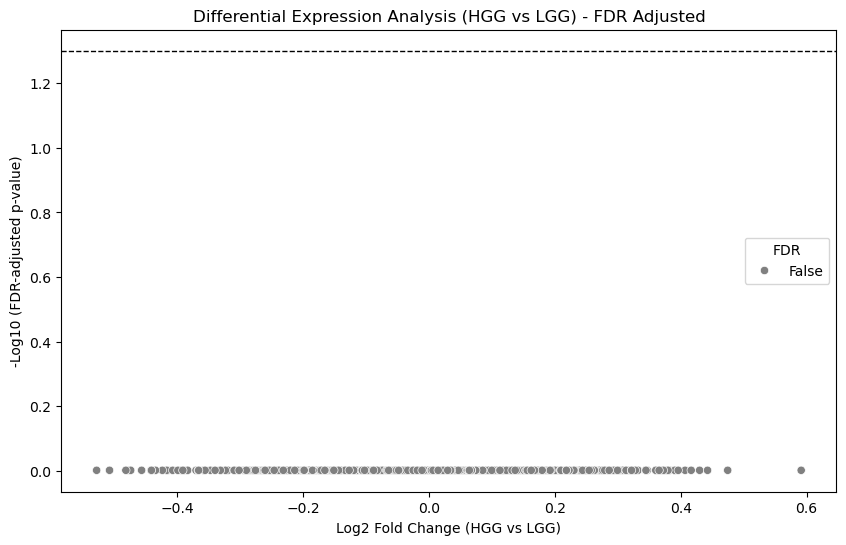

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# ---------------------------------
# Step 1: Load Expression Data
# ---------------------------------
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'

# Skip first two lines of metadata
glioma_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Extract gene names and cell line expression data
gene_names = glioma_df[['Name', 'Description']]
cell_line_data = glioma_df.iloc[:, 2:]

# ---------------------------------
# Step 2: Define LGG and HGG Cell Lines
# ---------------------------------
lgg_lines = [
    "T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM", 
    "U251MG_CENTRAL_NERVOUS_SYSTEM", "U87MG_CENTRAL_NERVOUS_SYSTEM",
    "1321N1_CENTRAL_NERVOUS_SYSTEM", "H4_CENTRAL_NERVOUS_SYSTEM",
    "SW1088_CENTRAL_NERVOUS_SYSTEM", "SW1783_CENTRAL_NERVOUS_SYSTEM",
    "HS683_CENTRAL_NERVOUS_SYSTEM", "DKMG_CENTRAL_NERVOUS_SYSTEM",
    "LN382_CENTRAL_NERVOUS_SYSTEM", "LNZ308_CENTRAL_NERVOUS_SYSTEM",
    "LN340_CENTRAL_NERVOUS_SYSTEM", "IOMMLEE_CENTRAL_NERVOUS_SYSTEM"
]

hgg_lines = [
    "LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM",
    "DBTRG05MG_CENTRAL_NERVOUS_SYSTEM", "M059K_CENTRAL_NERVOUS_SYSTEM",
    "GOS3_CENTRAL_NERVOUS_SYSTEM", "SNB19_CENTRAL_NERVOUS_SYSTEM",
    "U118MG_CENTRAL_NERVOUS_SYSTEM", "LN229_CENTRAL_NERVOUS_SYSTEM",
    "SF126_CENTRAL_NERVOUS_SYSTEM", "D341MED_CENTRAL_NERVOUS_SYSTEM",
    "D283MED_CENTRAL_NERVOUS_SYSTEM", "KNS42_CENTRAL_NERVOUS_SYSTEM",
    "SNU1105_CENTRAL_NERVOUS_SYSTEM", "KNS60_CENTRAL_NERVOUS_SYSTEM",
    "KNS81_CENTRAL_NERVOUS_SYSTEM", "GB1_CENTRAL_NERVOUS_SYSTEM",
    "LN428_CENTRAL_NERVOUS_SYSTEM", "LN443_CENTRAL_NERVOUS_SYSTEM",
    "LN464_CENTRAL_NERVOUS_SYSTEM", "CH157MN_CENTRAL_NERVOUS_SYSTEM"
]

# Check if selected cell lines exist in the dataset
selected_cell_lines = lgg_lines + hgg_lines
missing_lines = [cl for cl in selected_cell_lines if cl not in cell_line_data.columns]
if missing_lines:
    print(f"Warning: The following cell lines are missing in the dataset: {missing_lines}")

# ---------------------------------
# Step 3: Subset Expression Data for LGG & HGG
# ---------------------------------
expression_data = cell_line_data[selected_cell_lines]
lgg_data = expression_data[lgg_lines]
hgg_data = expression_data[hgg_lines]

# ---------------------------------
# Step 4: Differential Expression Analysis (HGG vs LGG)
# ---------------------------------
p_values = []
fold_changes = []

for gene_idx in range(len(expression_data)):
    gene_lgg = lgg_data.iloc[gene_idx].dropna()
    gene_hgg = hgg_data.iloc[gene_idx].dropna()
    
    # Compute fold-change (log2)
    fold_change = np.log2(gene_hgg.mean() / gene_lgg.mean())
    
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(gene_hgg, gene_lgg, equal_var=False, nan_policy='omit')
    
    fold_changes.append(fold_change)
    p_values.append(p_val)

# Convert results into a DataFrame
de_results = pd.DataFrame({
    'Gene': gene_names['Description'],
    'log2FC': fold_changes,
    'p-value': p_values
})

# Adjust p-values using False Discovery Rate (FDR) correction
de_results['FDR'] = multipletests(de_results['p-value'], method='fdr_bh')[1]

# Save results
de_results.to_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Differential_Expression_HGG_vs_LGG_FDR.csv', index=False)

# ---------------------------------
# Step 5: Visualization - Volcano Plot Reflecting FDR-Adjusted P-Values
# ---------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=de_results, x='log2FC', y=-np.log10(de_results['FDR']), 
                hue=(de_results['FDR'] < 0.05), palette={True: 'red', False: 'gray'})

plt.axhline(y=-np.log10(0.05), linestyle='dashed', color='black', linewidth=1)  # FDR significance threshold
plt.xlabel('Log2 Fold Change (HGG vs LGG)')
plt.ylabel('-Log10 (FDR-adjusted p-value)')
plt.title('Differential Expression Analysis (HGG vs LGG) - FDR Adjusted')
plt.show()

Pairwise differential expression results saved to /Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Pairwise_DE_HGG_vs_LGG.csv


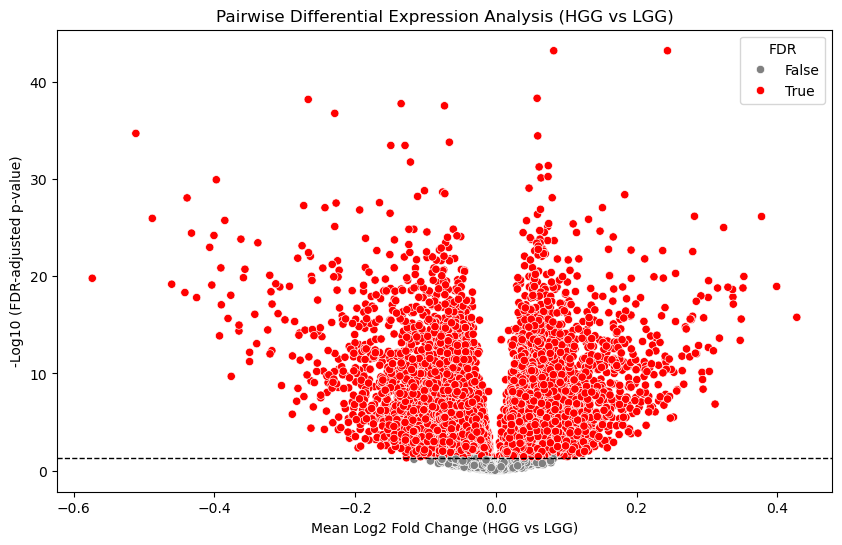

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# ---------------------------------
# Step 1: Load Expression Data
# ---------------------------------
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'
glioma_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Extract gene info and count data (using the 'Description' for gene names)
gene_info = glioma_df[['Name', 'Description']]
cell_line_data = glioma_df.iloc[:, 2:]
selected_cell_lines = [
    # LGG cell lines
    "T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM", 
    "U251MG_CENTRAL_NERVOUS_SYSTEM", "U87MG_CENTRAL_NERVOUS_SYSTEM",
    "1321N1_CENTRAL_NERVOUS_SYSTEM", "H4_CENTRAL_NERVOUS_SYSTEM",
    "SW1088_CENTRAL_NERVOUS_SYSTEM", "SW1783_CENTRAL_NERVOUS_SYSTEM",
    "HS683_CENTRAL_NERVOUS_SYSTEM", "DKMG_CENTRAL_NERVOUS_SYSTEM",
    "LN382_CENTRAL_NERVOUS_SYSTEM", "LNZ308_CENTRAL_NERVOUS_SYSTEM",
    "LN340_CENTRAL_NERVOUS_SYSTEM", "IOMMLEE_CENTRAL_NERVOUS_SYSTEM",
    # HGG cell lines
    "LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM",
    "DBTRG05MG_CENTRAL_NERVOUS_SYSTEM", "M059K_CENTRAL_NERVOUS_SYSTEM",
    "GOS3_CENTRAL_NERVOUS_SYSTEM", "SNB19_CENTRAL_NERVOUS_SYSTEM",
    "U118MG_CENTRAL_NERVOUS_SYSTEM", "LN229_CENTRAL_NERVOUS_SYSTEM",
    "SF126_CENTRAL_NERVOUS_SYSTEM", "D341MED_CENTRAL_NERVOUS_SYSTEM",
    "D283MED_CENTRAL_NERVOUS_SYSTEM", "KNS42_CENTRAL_NERVOUS_SYSTEM",
    "SNU1105_CENTRAL_NERVOUS_SYSTEM", "KNS60_CENTRAL_NERVOUS_SYSTEM",
    "KNS81_CENTRAL_NERVOUS_SYSTEM", "GB1_CENTRAL_NERVOUS_SYSTEM",
    "LN428_CENTRAL_NERVOUS_SYSTEM", "LN443_CENTRAL_NERVOUS_SYSTEM",
    "LN464_CENTRAL_NERVOUS_SYSTEM", "CH157MN_CENTRAL_NERVOUS_SYSTEM"
]

# Subset and reformat data: use gene 'Description' as row index
counts_subset = cell_line_data[selected_cell_lines]
counts_subset.index = gene_info['Description']
# Transpose so rows are samples and columns are genes
counts_df = counts_subset.transpose().astype(float)

# ---------------------------------
# Step 2: Define LGG and HGG Groups
# ---------------------------------
lgg_lines = [
    "T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM", 
    "U251MG_CENTRAL_NERVOUS_SYSTEM", "U87MG_CENTRAL_NERVOUS_SYSTEM",
    "1321N1_CENTRAL_NERVOUS_SYSTEM", "H4_CENTRAL_NERVOUS_SYSTEM",
    "SW1088_CENTRAL_NERVOUS_SYSTEM", "SW1783_CENTRAL_NERVOUS_SYSTEM",
    "HS683_CENTRAL_NERVOUS_SYSTEM", "DKMG_CENTRAL_NERVOUS_SYSTEM",
    "LN382_CENTRAL_NERVOUS_SYSTEM", "LNZ308_CENTRAL_NERVOUS_SYSTEM",
    "LN340_CENTRAL_NERVOUS_SYSTEM", "IOMMLEE_CENTRAL_NERVOUS_SYSTEM"
]

hgg_lines = [
    "LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM",
    "DBTRG05MG_CENTRAL_NERVOUS_SYSTEM", "M059K_CENTRAL_NERVOUS_SYSTEM",
    "GOS3_CENTRAL_NERVOUS_SYSTEM", "SNB19_CENTRAL_NERVOUS_SYSTEM",
    "U118MG_CENTRAL_NERVOUS_SYSTEM", "LN229_CENTRAL_NERVOUS_SYSTEM",
    "SF126_CENTRAL_NERVOUS_SYSTEM", "D341MED_CENTRAL_NERVOUS_SYSTEM",
    "D283MED_CENTRAL_NERVOUS_SYSTEM", "KNS42_CENTRAL_NERVOUS_SYSTEM",
    "SNU1105_CENTRAL_NERVOUS_SYSTEM", "KNS60_CENTRAL_NERVOUS_SYSTEM",
    "KNS81_CENTRAL_NERVOUS_SYSTEM", "GB1_CENTRAL_NERVOUS_SYSTEM",
    "LN428_CENTRAL_NERVOUS_SYSTEM", "LN443_CENTRAL_NERVOUS_SYSTEM",
    "LN464_CENTRAL_NERVOUS_SYSTEM", "CH157MN_CENTRAL_NERVOUS_SYSTEM"
]

# ---------------------------------
# Step 3: Pairwise Differential Expression Analysis
# ---------------------------------
results_list = []

for gene in counts_df.columns:
    # Extract expression values for the current gene for LGG and HGG groups
    lgg_vals = counts_df.loc[lgg_lines, gene].values
    hgg_vals = counts_df.loc[hgg_lines, gene].values
    
    # Compute all pairwise log2 fold changes: log2(hgg / lgg)
    # Use broadcasting: result is a matrix with shape (len(hgg_vals), len(lgg_vals))
    fc_matrix = np.log2(hgg_vals[:, None] / lgg_vals[None, :])
    fc_values = fc_matrix.flatten()
    
    # Compute the mean log2 fold change for this gene
    mean_fc = np.mean(fc_values)
    
    # Perform a one-sample t-test on the fold change values (test if mean is different from 0)
    t_stat, p_val = stats.ttest_1samp(fc_values, popmean=0)
    
    results_list.append({
        'Gene': gene,
        'mean_log2FC': mean_fc,
        'p-value': p_val
    })

de_results = pd.DataFrame(results_list)
# Adjust p-values using FDR correction
de_results['FDR'] = multipletests(de_results['p-value'], method='fdr_bh')[1]

# Save results
output_csv = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Pairwise_DE_HGG_vs_LGG.csv'
de_results.to_csv(output_csv, index=False)
print(f"Pairwise differential expression results saved to {output_csv}")

# ---------------------------------
# Step 4: Visualization - Volcano Plot for Pairwise Comparison
# ---------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=de_results, x='mean_log2FC', y=-np.log10(de_results['FDR']),
                hue=(de_results['FDR'] < 0.05), palette={True: 'red', False: 'gray'})
plt.axhline(y=-np.log10(0.05), linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Mean Log2 Fold Change (HGG vs LGG)')
plt.ylabel('-Log10 (FDR-adjusted p-value)')
plt.title('Pairwise Differential Expression Analysis (HGG vs LGG)')
plt.show()

Pairwise differential expression results saved to /Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Pairwise_DE_HGG_vs_LGG.csv


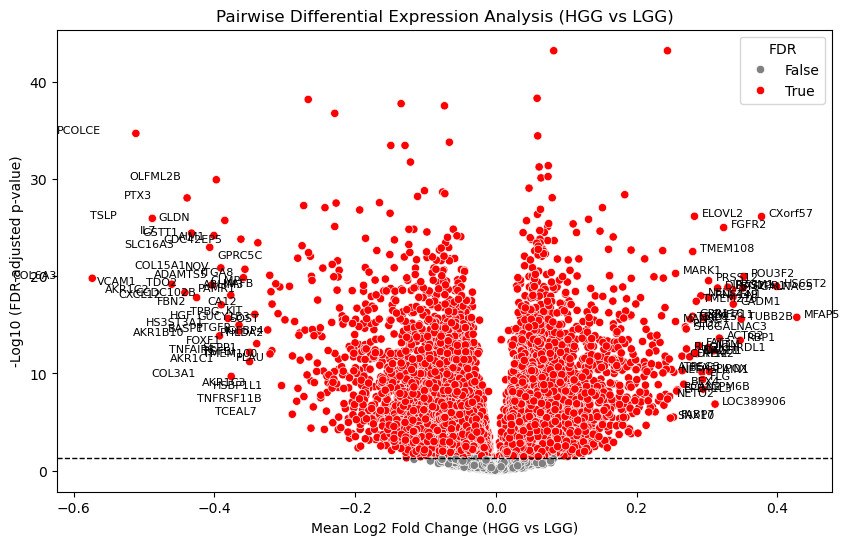

In [36]:
# annotate/label the top up/downregulated genes


import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# ---------------------------------
# Step 1: Load Expression Data
# ---------------------------------
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'
glioma_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Extract gene info and count data (using the 'Description' for gene names)
gene_info = glioma_df[['Name', 'Description']]
cell_line_data = glioma_df.iloc[:, 2:]
selected_cell_lines = [
    # LGG cell lines
    "T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM", 
    "U251MG_CENTRAL_NERVOUS_SYSTEM", "U87MG_CENTRAL_NERVOUS_SYSTEM",
    "1321N1_CENTRAL_NERVOUS_SYSTEM", "H4_CENTRAL_NERVOUS_SYSTEM",
    "SW1088_CENTRAL_NERVOUS_SYSTEM", "SW1783_CENTRAL_NERVOUS_SYSTEM",
    "HS683_CENTRAL_NERVOUS_SYSTEM", "DKMG_CENTRAL_NERVOUS_SYSTEM",
    "LN382_CENTRAL_NERVOUS_SYSTEM", "LNZ308_CENTRAL_NERVOUS_SYSTEM",
    "LN340_CENTRAL_NERVOUS_SYSTEM", "IOMMLEE_CENTRAL_NERVOUS_SYSTEM",
    # HGG cell lines
    "LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM",
    "DBTRG05MG_CENTRAL_NERVOUS_SYSTEM", "M059K_CENTRAL_NERVOUS_SYSTEM",
    "GOS3_CENTRAL_NERVOUS_SYSTEM", "SNB19_CENTRAL_NERVOUS_SYSTEM",
    "U118MG_CENTRAL_NERVOUS_SYSTEM", "LN229_CENTRAL_NERVOUS_SYSTEM",
    "SF126_CENTRAL_NERVOUS_SYSTEM", "D341MED_CENTRAL_NERVOUS_SYSTEM",
    "D283MED_CENTRAL_NERVOUS_SYSTEM", "KNS42_CENTRAL_NERVOUS_SYSTEM",
    "SNU1105_CENTRAL_NERVOUS_SYSTEM", "KNS60_CENTRAL_NERVOUS_SYSTEM",
    "KNS81_CENTRAL_NERVOUS_SYSTEM", "GB1_CENTRAL_NERVOUS_SYSTEM",
    "LN428_CENTRAL_NERVOUS_SYSTEM", "LN443_CENTRAL_NERVOUS_SYSTEM",
    "LN464_CENTRAL_NERVOUS_SYSTEM", "CH157MN_CENTRAL_NERVOUS_SYSTEM"
]

# Subset and reformat data: use gene 'Description' as row index
counts_subset = cell_line_data[selected_cell_lines]
counts_subset.index = gene_info['Description']
# Transpose so rows are samples and columns are genes
counts_df = counts_subset.transpose().astype(float)

# ---------------------------------
# Step 2: Define LGG and HGG Groups
# ---------------------------------
lgg_lines = [
    "T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM", 
    "U251MG_CENTRAL_NERVOUS_SYSTEM", "U87MG_CENTRAL_NERVOUS_SYSTEM",
    "1321N1_CENTRAL_NERVOUS_SYSTEM", "H4_CENTRAL_NERVOUS_SYSTEM",
    "SW1088_CENTRAL_NERVOUS_SYSTEM", "SW1783_CENTRAL_NERVOUS_SYSTEM",
    "HS683_CENTRAL_NERVOUS_SYSTEM", "DKMG_CENTRAL_NERVOUS_SYSTEM",
    "LN382_CENTRAL_NERVOUS_SYSTEM", "LNZ308_CENTRAL_NERVOUS_SYSTEM",
    "LN340_CENTRAL_NERVOUS_SYSTEM", "IOMMLEE_CENTRAL_NERVOUS_SYSTEM"
]

hgg_lines = [
    "LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM",
    "DBTRG05MG_CENTRAL_NERVOUS_SYSTEM", "M059K_CENTRAL_NERVOUS_SYSTEM",
    "GOS3_CENTRAL_NERVOUS_SYSTEM", "SNB19_CENTRAL_NERVOUS_SYSTEM",
    "U118MG_CENTRAL_NERVOUS_SYSTEM", "LN229_CENTRAL_NERVOUS_SYSTEM",
    "SF126_CENTRAL_NERVOUS_SYSTEM", "D341MED_CENTRAL_NERVOUS_SYSTEM",
    "D283MED_CENTRAL_NERVOUS_SYSTEM", "KNS42_CENTRAL_NERVOUS_SYSTEM",
    "SNU1105_CENTRAL_NERVOUS_SYSTEM", "KNS60_CENTRAL_NERVOUS_SYSTEM",
    "KNS81_CENTRAL_NERVOUS_SYSTEM", "GB1_CENTRAL_NERVOUS_SYSTEM",
    "LN428_CENTRAL_NERVOUS_SYSTEM", "LN443_CENTRAL_NERVOUS_SYSTEM",
    "LN464_CENTRAL_NERVOUS_SYSTEM", "CH157MN_CENTRAL_NERVOUS_SYSTEM"
]

# ---------------------------------
# Step 3: Pairwise Differential Expression Analysis
# ---------------------------------
results_list = []

for gene in counts_df.columns:
    # Extract expression values for the current gene for LGG and HGG groups
    lgg_vals = counts_df.loc[lgg_lines, gene].values
    hgg_vals = counts_df.loc[hgg_lines, gene].values
    
    # Compute all pairwise log2 fold changes: log2(hgg / lgg)
    fc_matrix = np.log2(hgg_vals[:, None] / lgg_vals[None, :])
    fc_values = fc_matrix.flatten()
    
    # Mean log2 fold change
    mean_fc = np.mean(fc_values)
    
    # One-sample t-test against 0
    t_stat, p_val = stats.ttest_1samp(fc_values, popmean=0)
    
    results_list.append({
        'Gene': gene,
        'mean_log2FC': mean_fc,
        'p-value': p_val
    })

de_results = pd.DataFrame(results_list)
# Adjust p-values using FDR
de_results['FDR'] = multipletests(de_results['p-value'], method='fdr_bh')[1]

# Save results
output_csv = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Pairwise_DE_HGG_vs_LGG.csv'
de_results.to_csv(output_csv, index=False)
print(f"Pairwise differential expression results saved to {output_csv}")

# ---------------------------------
# Step 4: Volcano Plot with Gene Labels
# ---------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=de_results, x='mean_log2FC', y=-np.log10(de_results['FDR']),
                hue=(de_results['FDR'] < 0.05), palette={True: 'red', False: 'gray'})

plt.axhline(y=-np.log10(0.05), linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Mean Log2 Fold Change (HGG vs LGG)')
plt.ylabel('-Log10 (FDR-adjusted p-value)')
plt.title('Pairwise Differential Expression Analysis (HGG vs LGG)')

# -----------------------
# Annotate Top Genes
# -----------------------
# Label the top N upregulated (highest mean_log2FC) and top N downregulated (lowest mean_log2FC)
TOP_N = 50

# Get top up/down genes
top_up = de_results.nlargest(TOP_N, 'mean_log2FC')
top_down = de_results.nsmallest(TOP_N, 'mean_log2FC')

# Annotate top upregulated genes
for i, row in top_up.iterrows():
    plt.text(
        x=row['mean_log2FC'] + 0.01, 
        y=-np.log10(row['FDR']), 
        s=row['Gene'],
        fontsize=8
    )

# Annotate top downregulated genes
for i, row in top_down.iterrows():
    plt.text(
        x=row['mean_log2FC'] - 0.05, 
        y=-np.log10(row['FDR']), 
        s=row['Gene'],
        fontsize=8,
        horizontalalignment='right'
    )

plt.show()

Pairwise differential expression results saved to /Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Pairwise_DE_HGG_vs_LGG.csv


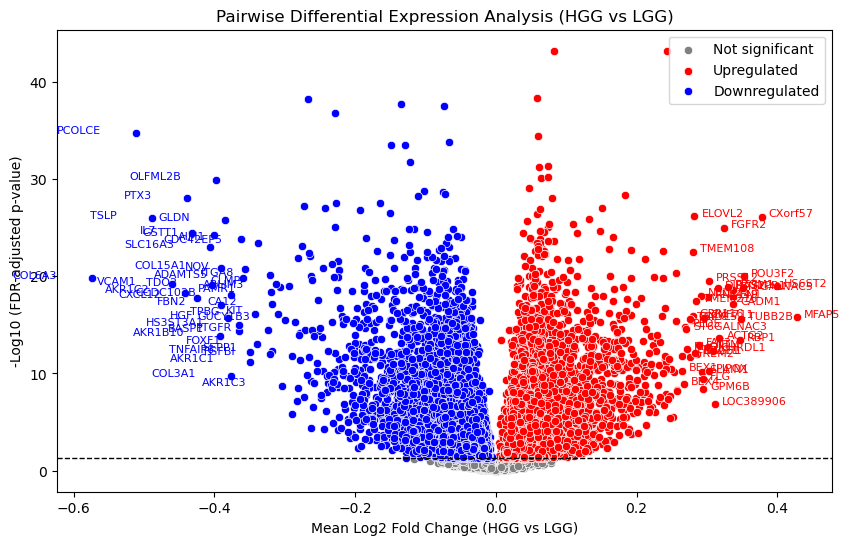

In [41]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# ---------------------------------
# Step 1: Load Expression Data
# ---------------------------------
gct_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/CCLE_CNS_Filtered.gct'
glioma_df = pd.read_csv(gct_file, sep='\t', skiprows=2)

# Extract gene info and count data (using the 'Description' for gene names)
gene_info = glioma_df[['Name', 'Description']]
cell_line_data = glioma_df.iloc[:, 2:]
selected_cell_lines = [
    # LGG cell lines
    "T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM", 
    "U251MG_CENTRAL_NERVOUS_SYSTEM", "U87MG_CENTRAL_NERVOUS_SYSTEM",
    "1321N1_CENTRAL_NERVOUS_SYSTEM", "H4_CENTRAL_NERVOUS_SYSTEM",
    "SW1088_CENTRAL_NERVOUS_SYSTEM", "SW1783_CENTRAL_NERVOUS_SYSTEM",
    "HS683_CENTRAL_NERVOUS_SYSTEM", "DKMG_CENTRAL_NERVOUS_SYSTEM",
    "LN382_CENTRAL_NERVOUS_SYSTEM", "LNZ308_CENTRAL_NERVOUS_SYSTEM",
    "LN340_CENTRAL_NERVOUS_SYSTEM", "IOMMLEE_CENTRAL_NERVOUS_SYSTEM",
    # HGG cell lines
    "LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM",
    "DBTRG05MG_CENTRAL_NERVOUS_SYSTEM", "M059K_CENTRAL_NERVOUS_SYSTEM",
    "GOS3_CENTRAL_NERVOUS_SYSTEM", "SNB19_CENTRAL_NERVOUS_SYSTEM",
    "U118MG_CENTRAL_NERVOUS_SYSTEM", "LN229_CENTRAL_NERVOUS_SYSTEM",
    "SF126_CENTRAL_NERVOUS_SYSTEM", "D341MED_CENTRAL_NERVOUS_SYSTEM",
    "D283MED_CENTRAL_NERVOUS_SYSTEM", "KNS42_CENTRAL_NERVOUS_SYSTEM",
    "SNU1105_CENTRAL_NERVOUS_SYSTEM", "KNS60_CENTRAL_NERVOUS_SYSTEM",
    "KNS81_CENTRAL_NERVOUS_SYSTEM", "GB1_CENTRAL_NERVOUS_SYSTEM",
    "LN428_CENTRAL_NERVOUS_SYSTEM", "LN443_CENTRAL_NERVOUS_SYSTEM",
    "LN464_CENTRAL_NERVOUS_SYSTEM", "CH157MN_CENTRAL_NERVOUS_SYSTEM"
]

# Subset and reformat data: use gene 'Description' as row index
counts_subset = cell_line_data[selected_cell_lines]
counts_subset.index = gene_info['Description']
# Transpose so rows are samples and columns are genes
counts_df = counts_subset.transpose().astype(float)

# ---------------------------------
# Step 2: Define LGG and HGG Groups
# ---------------------------------
lgg_lines = [
    "T98G_CENTRAL_NERVOUS_SYSTEM", "A172_CENTRAL_NERVOUS_SYSTEM", 
    "U251MG_CENTRAL_NERVOUS_SYSTEM", "U87MG_CENTRAL_NERVOUS_SYSTEM",
    "1321N1_CENTRAL_NERVOUS_SYSTEM", "H4_CENTRAL_NERVOUS_SYSTEM",
    "SW1088_CENTRAL_NERVOUS_SYSTEM", "SW1783_CENTRAL_NERVOUS_SYSTEM",
    "HS683_CENTRAL_NERVOUS_SYSTEM", "DKMG_CENTRAL_NERVOUS_SYSTEM",
    "LN382_CENTRAL_NERVOUS_SYSTEM", "LNZ308_CENTRAL_NERVOUS_SYSTEM",
    "LN340_CENTRAL_NERVOUS_SYSTEM", "IOMMLEE_CENTRAL_NERVOUS_SYSTEM"
]

hgg_lines = [
    "LN18_CENTRAL_NERVOUS_SYSTEM", "SF295_CENTRAL_NERVOUS_SYSTEM",
    "DBTRG05MG_CENTRAL_NERVOUS_SYSTEM", "M059K_CENTRAL_NERVOUS_SYSTEM",
    "GOS3_CENTRAL_NERVOUS_SYSTEM", "SNB19_CENTRAL_NERVOUS_SYSTEM",
    "U118MG_CENTRAL_NERVOUS_SYSTEM", "LN229_CENTRAL_NERVOUS_SYSTEM",
    "SF126_CENTRAL_NERVOUS_SYSTEM", "D341MED_CENTRAL_NERVOUS_SYSTEM",
    "D283MED_CENTRAL_NERVOUS_SYSTEM", "KNS42_CENTRAL_NERVOUS_SYSTEM",
    "SNU1105_CENTRAL_NERVOUS_SYSTEM", "KNS60_CENTRAL_NERVOUS_SYSTEM",
    "KNS81_CENTRAL_NERVOUS_SYSTEM", "GB1_CENTRAL_NERVOUS_SYSTEM",
    "LN428_CENTRAL_NERVOUS_SYSTEM", "LN443_CENTRAL_NERVOUS_SYSTEM",
    "LN464_CENTRAL_NERVOUS_SYSTEM", "CH157MN_CENTRAL_NERVOUS_SYSTEM"
]

# ---------------------------------
# Step 3: Pairwise Differential Expression Analysis
# ---------------------------------
results_list = []

for gene in counts_df.columns:
    # Extract expression values for current gene for LGG and HGG groups
    lgg_vals = counts_df.loc[lgg_lines, gene].values
    hgg_vals = counts_df.loc[hgg_lines, gene].values
    
    # Compute all pairwise log2 fold changes: log2(hgg / lgg)
    fc_matrix = np.log2(hgg_vals[:, None] / lgg_vals[None, :])
    fc_values = fc_matrix.flatten()
    
    # Mean log2 fold change for this gene
    mean_fc = np.mean(fc_values)
    
    # One-sample t-test on the fold change values (test if mean differs from 0)
    t_stat, p_val = stats.ttest_1samp(fc_values, popmean=0)
    
    results_list.append({
        'Gene': gene,
        'mean_log2FC': mean_fc,
        'p-value': p_val
    })

de_results = pd.DataFrame(results_list)
# Adjust p-values using FDR
de_results['FDR'] = multipletests(de_results['p-value'], method='fdr_bh')[1]

# Save results
output_csv = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Pairwise_DE_HGG_vs_LGG.csv'
de_results.to_csv(output_csv, index=False)
print(f"Pairwise differential expression results saved to {output_csv}")

# ---------------------------------
# Step 4: Volcano Plot with Group-Specific Colors
# ---------------------------------
plt.figure(figsize=(10, 6))

# Separate significant from non-significant points based on FDR threshold
sig_threshold = 0.05
not_sig = de_results[de_results['FDR'] >= sig_threshold]
sig = de_results[de_results['FDR'] < sig_threshold]

# Among significant, separate upregulated and downregulated
sig_up = sig[sig['mean_log2FC'] > 0]
sig_down = sig[sig['mean_log2FC'] < 0]

# Plot non-significant genes in gray
sns.scatterplot(data=not_sig, x='mean_log2FC', y=-np.log10(not_sig['FDR']), color='gray', label='Not significant')

# Plot significant upregulated genes in red
sns.scatterplot(data=sig_up, x='mean_log2FC', y=-np.log10(sig_up['FDR']), color='red', label='Upregulated')

# Plot significant downregulated genes in blue
sns.scatterplot(data=sig_down, x='mean_log2FC', y=-np.log10(sig_down['FDR']), color='blue', label='Downregulated')

plt.axhline(y=-np.log10(sig_threshold), linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Mean Log2 Fold Change (HGG vs LGG)')
plt.ylabel('-Log10 (FDR-adjusted p-value)')
plt.title('Pairwise Differential Expression Analysis (HGG vs LGG)')

# -----------------------
# Annotate Top Genes from Significant Groups
# -----------------------
TOP_N = 40

top_up = sig_up.nlargest(TOP_N, 'mean_log2FC')
top_down = sig_down.nsmallest(TOP_N, 'mean_log2FC')

# Annotate upregulated genes (red)
for i, row in top_up.iterrows():
    plt.text(
        x=row['mean_log2FC'] + 0.01,
        y=-np.log10(row['FDR']),
        s=row['Gene'],
        fontsize=8,
        color='red'
    )

# Annotate downregulated genes (blue)
for i, row in top_down.iterrows():
    plt.text(
        x=row['mean_log2FC'] - 0.05,
        y=-np.log10(row['FDR']),
        s=row['Gene'],
        fontsize=8,
        horizontalalignment='right',
        color='blue'
    )

plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Load the differential expression results (saved as Pairwise_DE_HGG_vs_LGG.csv)
de_results = pd.read_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Pairwise_DE_HGG_vs_LGG.csv')

# Relax the cutoffs:
# Use FDR < 0.1 and absolute mean_log2FC >= 0.5
significant_genes = de_results[
    (de_results['FDR'] < 0.05) &
    (de_results['mean_log2FC'].abs() >= 0.25)
].copy()

# Sort by mean_log2FC (or you could sort by p-value)
significant_genes.sort_values('mean_log2FC', ascending=False, inplace=True)

# Save these genes to a new CSV
output_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Significant_DE_Genes_relaxed.csv'
significant_genes.to_csv(output_file, index=False)

print(f"Found {len(significant_genes)} significantly DE genes with FDR < 0.1 and abs(log2FC) >= 0.5.")

# Print the list of DE genes with their fold changes and FDR values
print("Differentially Expressed Genes (FDR < 0.1 and |log2FC| ≥ 0.5):")
print(significant_genes[['Gene', 'mean_log2FC', 'FDR']])

Found 118 significantly DE genes with FDR < 0.1 and abs(log2FC) >= 0.5.
Differentially Expressed Genes (FDR < 0.1 and |log2FC| ≥ 0.5):
          Gene  mean_log2FC           FDR
16113    MFAP5     0.427767  1.691058e-16
17718   HS6ST2     0.399151  1.138683e-19
11658  CXorf57     0.377665  7.327239e-27
11294   POU3F2     0.352525  1.070292e-20
4479     S1PR1     0.351236  1.628972e-19
...        ...          ...           ...
4178    AKR1C2    -0.442059  4.795782e-19
15094    VCAM1    -0.460844  6.680433e-20
17296     TSLP    -0.488413  1.137066e-26
10492   PCOLCE    -0.511785  2.098204e-35
2871    COL6A3    -0.573771  1.635875e-20

[118 rows x 3 columns]


Summary Statistics for Significant DE Genes:
       mean_log2FC  FDR
count          0.0  0.0
mean           NaN  NaN
std            NaN  NaN
min            NaN  NaN
25%            NaN  NaN
50%            NaN  NaN
75%            NaN  NaN
max            NaN  NaN
Number of upregulated genes: 0
Number of downregulated genes: 0
Found 0 significantly DE genes with FDR < 0.1 and |log2FC| >= 0.5.


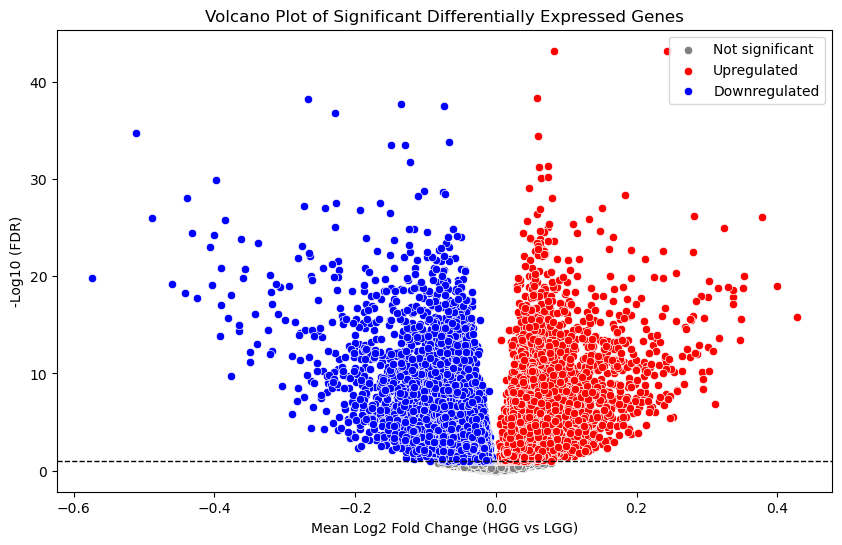

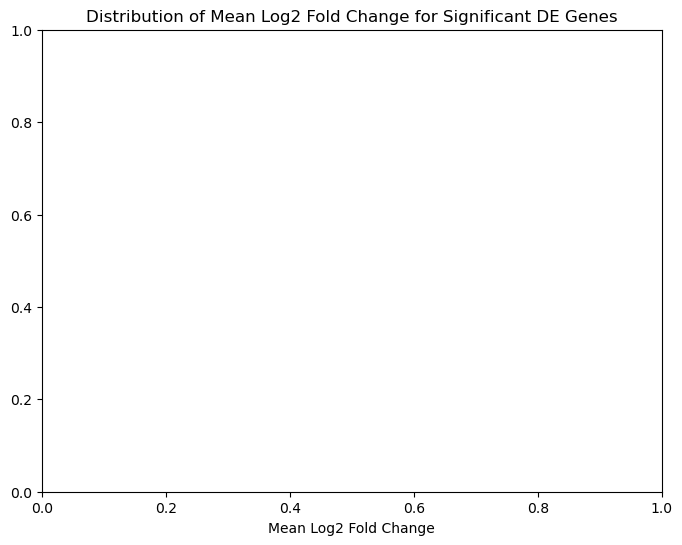

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the differential expression results (saved as Pairwise_DE_HGG_vs_LGG.csv)
de_results = pd.read_csv('/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Pairwise_DE_HGG_vs_LGG.csv')

# Filter using relaxed cutoffs: FDR < 0.1 and absolute mean_log2FC >= 0.5
significant_genes = de_results[
    (de_results['FDR'] < 0.1) &
    (de_results['mean_log2FC'].abs() >= 0.6)
].copy()

# Print summary statistics
print("Summary Statistics for Significant DE Genes:")
print(significant_genes[['mean_log2FC', 'FDR']].describe())

# Count the number of upregulated and downregulated genes
num_up = (significant_genes['mean_log2FC'] > 0).sum()
num_down = (significant_genes['mean_log2FC'] < 0).sum()
print(f"Number of upregulated genes: {num_up}")
print(f"Number of downregulated genes: {num_down}")

# Save these genes to a new CSV (if needed)
output_file = '/Users/zhangyuhong/Desktop/UCSD Bioe course/BENG 204/final_project/data_processed/Significant_DE_Genes_relaxed.csv'
significant_genes.to_csv(output_file, index=False)
print(f"Found {len(significant_genes)} significantly DE genes with FDR < 0.1 and |log2FC| >= 0.5.")

# ------------------------------
# Volcano Plot: Use gray for non-significant, red for significant upregulated, blue for significant downregulated
# ------------------------------
plt.figure(figsize=(10, 6))
sig_threshold = 0.1  # FDR threshold
# Separate data into non-significant and significant points based on FDR
not_sig = de_results[de_results['FDR'] >= sig_threshold]
sig = de_results[de_results['FDR'] < sig_threshold]

# Among significant, separate upregulated (mean_log2FC > 0) and downregulated (mean_log2FC < 0)
sig_up = sig[sig['mean_log2FC'] > 0]
sig_down = sig[sig['mean_log2FC'] < 0]

# Plot non-significant genes in gray
sns.scatterplot(data=not_sig, x='mean_log2FC', y=-np.log10(not_sig['FDR']), color='gray', label='Not significant')
# Plot significant upregulated genes in red
sns.scatterplot(data=sig_up, x='mean_log2FC', y=-np.log10(sig_up['FDR']), color='red', label='Upregulated')
# Plot significant downregulated genes in blue
sns.scatterplot(data=sig_down, x='mean_log2FC', y=-np.log10(sig_down['FDR']), color='blue', label='Downregulated')

plt.axhline(y=-np.log10(sig_threshold), linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Mean Log2 Fold Change (HGG vs LGG)')
plt.ylabel('-Log10 (FDR)')
plt.title('Volcano Plot of Significant Differentially Expressed Genes')
plt.legend()
plt.show()

# ------------------------------
# Histogram of Mean Log2 Fold Changes for Significant Genes
# ------------------------------
plt.figure(figsize=(8, 6))
sns.histplot(significant_genes['mean_log2FC'], bins=30, kde=True, color='purple')
plt.xlabel('Mean Log2 Fold Change')
plt.title('Distribution of Mean Log2 Fold Change for Significant DE Genes')
plt.show()